# Bojack Horeseman and Netflix Stock Prices

### Instructions


* **Extraction**

  * Put each CSV into a pandas DataFrame.

* **Transform**

  * Copy only the columns needed into a new DataFrame.

  * Rename columns to fit the tables created in the database.

  * Handle any duplicates. **HINT:** some locations have the same name but each license number is unique.

  * Set index to the previously created primary key.

* **Load**

  * Create a connection to database.

  * Check for a successful connection to the database and confirm that the tables have been created.

  * Append DataFrames to tables. Be sure to use the index set earlier.



In [12]:
import pandas as pd
from sqlalchemy import create_engine
import os

### Read *Bojack Horeseman Season 1-5 Release Date and Ratings* CSV

In [13]:
bojack_csv = os.path.join("..", "Resources", "Bojack_Ratings.csv")
bojack_df = pd.read_csv(bojack_csv)

bojack_df["Release Date"] = bojack_df['AIR MONTH'].map(str) + "/" + bojack_df['AIR DAY'].map(str) + "/" + bojack_df['YEAR'].map(str)

bojack_df.head()

,SEASON,EPISODE,EPISODE TIME (NETFLIX),RATING (IMDB),YEAR,AIR MONTH,AIR DAY,Release Date
0,1,1,25.38,7.1,2014,8,22,8/22/2014
1,1,2,25.34,7.7,2014,8,22,8/22/2014
2,1,3,25.59,7.4,2014,8,22,8/22/2014
3,1,4,25.36,7.4,2014,8,22,8/22/2014
4,1,5,25.32,7.4,2014,8,22,8/22/2014


### Read *Netflix* CSV

In [14]:
netflix_csv = os.path.join("..", "Resources", "NFLX_Stock.csv")
netflix_df = pd.read_csv(netflix_csv)

netflix_df.head()

,year,date,open,high,low,close,volume
0,2014,1/2/14,52.4014,52.5114,51.5429,51.8314,12325600
1,2014,1/3/14,52.0000,52.4956,51.8429,51.8714,10817100
2,2014,1/6/14,51.8900,52.0443,50.4757,51.3671,15501500
3,2014,1/7/14,49.6843,49.6986,48.1529,48.5000,36167600
4,2014,1/8/14,48.1043,49.4257,48.0743,48.7129,20001100


In [15]:
netflix_df['Month']=[int(d.split('/')[0]) for d in netflix_df.date]
netflix_df['Day']=[int(d.split('/')[1]) for d in netflix_df.date]
netflix_df['Year']=[int(d.split('/')[2]) for d in netflix_df.date]

netflix_df.head()

,year,date,open,high,low,close,volume,Month,Day,Year
0,2014,1/2/14,52.4014,52.5114,51.5429,51.8314,12325600,1,2,14
1,2014,1/3/14,52.0000,52.4956,51.8429,51.8714,10817100,1,3,14
2,2014,1/6/14,51.8900,52.0443,50.4757,51.3671,15501500,1,6,14
3,2014,1/7/14,49.6843,49.6986,48.1529,48.5000,36167600,1,7,14
4,2014,1/8/14,48.1043,49.4257,48.0743,48.7129,20001100,1,8,14


'<table border="1" class="dataframe netflix">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>year</th>\n      <th>date</th>\n      <th>open</th>\n      <th>high</th>\n      <th>low</th>\n      <th>close</th>\n      <th>volume</th>\n      <th>Month</th>\n      <th>Day</th>\n      <th>Year</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>2014</td>\n      <td>1/2/14</td>\n      <td>52.4014</td>\n      <td>52.5114</td>\n      <td>51.5429</td>\n      <td>51.8314</td>\n      <td>12325600</td>\n      <td>1</td>\n      <td>2</td>\n      <td>14</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>2014</td>\n      <td>1/3/14</td>\n      <td>52.0000</td>\n      <td>52.4956</td>\n      <td>51.8429</td>\n      <td>51.8714</td>\n      <td>10817100</td>\n      <td>1</td>\n      <td>3</td>\n      <td>14</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2014</td>\n      <td>1/6/14</td>\n      <td>51.8900</td>\n      <td>52.0443</td>\n    

### Transform Bojack DataFrame

In [16]:
clean_bojack_df = bojack_df[["SEASON","EPISODE","RATING (IMDB)","YEAR","Release Date"]].copy()

# Rename the column headers
clean_bojack_df = clean_bojack_df.rename(columns={"Season": "SEASON",
                                                    "Episode": "EPISODE",
                                                    "IMDB Rating": "RATING (IMDB)",
                                                    "Year": "YEAR"})
# Display new df
clean_bojack_df.head(100)

,SEASON,EPISODE,RATING (IMDB),YEAR,Release Date
0,1,1,7.1,2014,8/22/2014
1,1,2,7.7,2014,8/22/2014
2,1,3,7.4,2014,8/22/2014
3,1,4,7.4,2014,8/22/2014
4,1,5,7.4,2014,8/22/2014
5,1,6,7.9,2014,8/22/2014
6,1,7,8.0,2014,8/22/2014
7,1,8,8.2,2014,8/22/2014
8,1,9,7.9,2014,8/22/2014
9,1,10,7.8,2014,8/22/2014


### Transform Netflix Stock DataFrame

In [8]:
# Create new dataFrame with specific columns
clean_netflix_df = netflix_df[["date","Month", "Day","year","open","high","low","close"]].copy()


# Rename the column headers
clean_netflix_df = clean_netflix_df.rename(columns={"date": "Date",
                                                    "Year": "Year",
                                                    "open": "Opening Price",
                                                    "high": "High Price",
                                                    "low": "Low Price",
                                                    "close": "Closing Price"})
# Display clean Netflix df
clean_netflix_df.head()

,Date,Month,Day,year,Opening Price,High Price,Low Price,Closing Price
0,1/2/14,1,2,2014,52.4014,52.5114,51.5429,51.8314
1,1/3/14,1,3,2014,52.0000,52.4956,51.8429,51.8714
2,1/6/14,1,6,2014,51.8900,52.0443,50.4757,51.3671
3,1/7/14,1,7,2014,49.6843,49.6986,48.1529,48.5000
4,1/8/14,1,8,2014,48.1043,49.4257,48.0743,48.7129


### Create database connection

In [17]:
pg_user = 'postgres'
pg_password = 'postgres'
db_name = 'bojack_db'

connection_string = f"{pg_user}:{pg_password}@localhost:5432/{db_name}"
engine = create_engine(f'postgresql://{connection_string}')

### Confirm tables

In [18]:
engine.table_names()

['clean_netflix_db']

### Load Clean Netflix dataFrame into into bojack_db

In [19]:
clean_netflix_df.to_sql(name='clean_netflix_db', con=engine, if_exists='append', index=True)

### Load Stock Prices from 1 week prior/after S1 release

In [99]:
s1_release = pd.read_sql_query('select * from clean_netflix_db where year = 2014 and "Month" = 8 and "Day" between 8 and 29', con=engine).head(11)
s1_release['Date'] = s1_release['Date'].astype(str)
s1_release = s1_release.set_index('Date')
s1_release

,index,Month,Day,year,Opening Price,High Price,Low Price,Closing Price
Date,,,,,,,,
8/8/14,151,8,8,2014,64.3143,64.4243,63.1500,63.6929
8/11/14,152,8,11,2014,64.1743,65.3786,64.1014,64.5057
8/12/14,153,8,12,2014,64.4786,64.7143,63.3443,63.7729
8/13/14,154,8,13,2014,64.0857,64.8879,63.8314,64.5043
8/14/14,155,8,14,2014,64.6014,65.0000,64.0314,64.4100
8/15/14,156,8,15,2014,64.4986,66.0000,64.0857,65.5843
8/18/14,157,8,18,2014,66.0086,67.0714,65.8929,66.5714
8/19/14,158,8,19,2014,66.7271,67.2143,66.0614,66.8786
8/20/14,159,8,20,2014,66.7143,67.6786,66.3630,67.4557


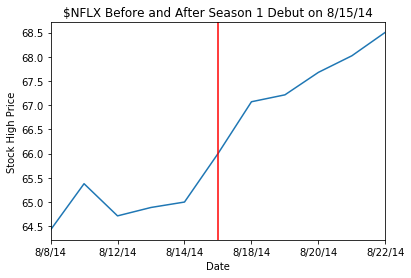

In [100]:
# creating new plot for NFLX Price Before and After Season 1 Release
ax1 = s1_release['High Price'].plot()
# setting Y axis label
ax1.set_ylabel('Stock High Price')
# setting X axis label
ax1.set_xlabel('Date')
ax1.axvline(x=5,color='red')
# set plot title
ax1.set_title('$NFLX Before and After Season 1 Debut on 8/15/14')
# show figure and save as PNG for presentation
ax1.get_figure().savefig('../Resources/screenshots/S1_Release.png')

### Load Stock Prices from 1 week prior/after S2 release

In [97]:
s2_release = pd.read_sql_query('select * from clean_netflix_db where year = 2015 and "Month" = 7 and "Day" between 10 and 24', con=engine).head(11)
s2_release['Date'] = s2_release['Date'].astype(str)
s2_release = s2_release.set_index('Date')
s2_release

,index,Month,Day,year,Opening Price,High Price,Low Price,Closing Price
Date,,,,,,,,
7/10/15,382,7,10,2015,97.5229,98.5028,96.9000,97.2286
7/13/15,383,7,13,2015,98.0986,102.3086,98.0788,101.0871
7/14/15,384,7,14,2015,101.2714,101.6357,99.6529,100.3714
7/15/15,385,7,15,2015,99.9700,100.7500,97.0500,98.1300
7/16/15,386,7,16,2015,111.0200,116.4900,107.6800,115.8100
7/17/15,387,7,17,2015,117.3400,117.8800,114.2400,114.7700
7/20/15,388,7,20,2015,114.7000,114.7000,110.1400,110.5500
7/21/15,389,7,21,2015,110.2100,113.7100,109.3200,112.5100
7/22/15,390,7,22,2015,112.1400,113.8800,110.5608,111.5000


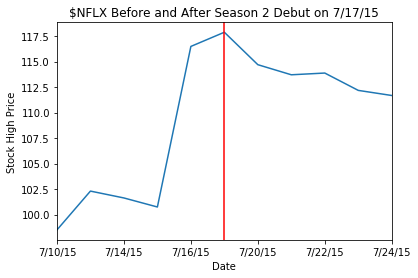

In [98]:
# creating new plot for NFLX Price Before and After Season 2 Release
ax2 = s2_release['High Price'].plot()
# setting Y axis label
ax2.set_ylabel('Stock High Price')
# setting X axis label
ax2.set_xlabel('Date')
ax2.axvline(x=5,color='red')
# set plot title
ax2.set_title('$NFLX Before and After Season 2 Debut on 7/17/15')
# show figure and save as PNG for presentation
ax2.get_figure().savefig('../Resources/screenshots/S2_Release.png')

### Load Stock Prices from 1 week prior/after S3 release

In [95]:
s3_release = pd.read_sql_query('select * from clean_netflix_db where year = 2016 and "Month" = 7 and "Day" between 15 and 29', con=engine).head(11)
s3_release['Date'] = s3_release['Date'].astype(str)
s3_release = s3_release.set_index('Date')
s3_release

,index,Month,Day,year,Opening Price,High Price,Low Price,Closing Price
Date,,,,,,,,
7/15/16,638,7,15,2016,98.52,98.700,97.41,98.39
7/18/16,639,7,18,2016,98.43,99.840,97.24,98.81
7/19/16,640,7,19,2016,85.43,86.750,84.50,85.84
7/20/16,641,7,20,2016,86.67,88.490,85.82,87.91
7/21/16,642,7,21,2016,88.30,88.380,85.21,85.99
7/22/16,643,7,22,2016,86.48,86.500,85.11,85.89
7/25/16,644,7,25,2016,85.73,87.870,85.01,87.66
7/26/16,645,7,26,2016,91.03,93.100,90.90,91.41
7/27/16,646,7,27,2016,91.50,92.060,90.10,92.04


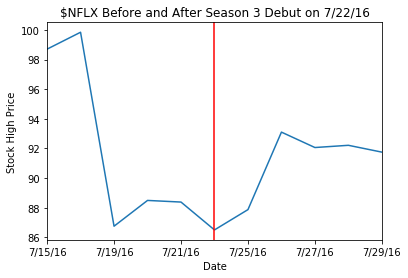

In [96]:
# creating new plot for NFLX Price Before and After Season 3 Release
ax3 = s3_release['High Price'].plot()
# setting Y axis label
ax3.set_ylabel('Stock High Price')
# setting X axis label
ax3.set_xlabel('Date')
ax3.axvline(x=5,color='red', label="Release Date")
# set plot title
ax3.set_title('$NFLX Before and After Season 3 Debut on 7/22/16')
# show figure and save as PNG for presentation
ax3.get_figure().savefig('../Resources/screenshots/S3_Release.png')

### Load Stock Prices from 1 week prior/after S4 release

In [88]:
s4_release = pd.read_sql_query('select * from clean_netflix_db where year = 2017 and "Month" = 9 and "Day" between 1 and 15', con=engine).head(11)
s4_release['Date'] = s4_release['Date'].astype(str)
s4_release = s4_release.set_index('Date')
s4_release

,index,Month,Day,year,Opening Price,High Price,Low Price,Closing Price
Date,,,,,,,,
9/1/17,924,9,1,2017,175.55,176.4800,173.9200,174.74
9/5/17,925,9,5,2017,173.40,175.8800,172.4400,174.52
9/6/17,926,9,6,2017,175.25,179.4600,173.7300,179.25
9/7/17,927,9,7,2017,178.80,180.3500,177.1000,179.00
9/8/17,928,9,8,2017,178.45,180.3900,176.2500,176.42
9/11/17,929,9,11,2017,178.10,182.4700,178.0300,181.74
9/12/17,930,9,12,2017,182.55,185.3300,180.6435,185.15
9/13/17,931,9,13,2017,184.07,184.4995,182.5500,183.64
9/14/17,932,9,14,2017,183.25,185.2882,182.0700,182.63


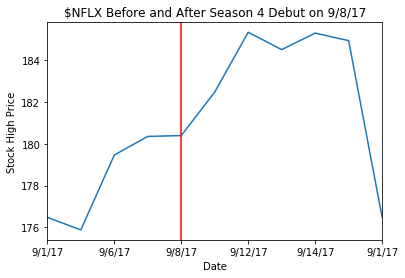

In [90]:
# creating new plot for NFLX Price Before and After Season 4 Release
ax4 = s4_release['High Price'].plot()
# setting Y axis label
ax4.set_ylabel('Stock High Price')
# setting X axis label
ax4.set_xlabel('Date')
ax4.axvline(x=4,color='red', label="Release Date")
# set plot title
ax4.set_title('$NFLX Before and After Season 4 Debut on 9/8/17')
# show figure and save as PNG for presentation
ax4.get_figure().savefig('../Resources/screenshots/S4_Release.png')

### Load Stock Prices from 1 week prior/after S5 release

In [93]:
s5_release = pd.read_sql_query('select * from clean_netflix_db where year = 2018 and "Month" = 9 and "Day" between 7 and 21', con=engine).head(11)
s5_release['Date'] = s5_release['Date'].astype(str)
s5_release = s5_release.set_index('Date')
s5_release

,index,Month,Day,year,Opening Price,High Price,Low Price,Closing Price
Date,,,,,,,,
9/7/18,1179,9,7,2018,342.20,355.75,341.2500,348.68
9/10/18,1180,9,10,2018,352.27,352.50,343.0800,348.41
9/11/18,1181,9,11,2018,344.67,356.15,343.9001,355.93
9/12/18,1182,9,12,2018,359.08,370.43,356.2400,369.95
9/13/18,1183,9,13,2018,371.91,374.09,366.8400,368.15
9/14/18,1184,9,14,2018,368.55,371.09,363.4600,364.56
9/17/18,1185,9,17,2018,364.22,367.33,349.5700,350.35
9/18/18,1186,9,18,2018,353.67,368.15,351.5600,367.65
9/19/18,1187,9,19,2018,373.95,377.61,359.1700,366.96


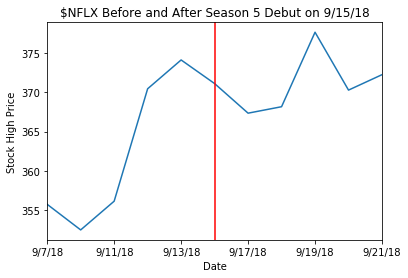

In [94]:
# creating new plot for NFLX Price Before and After Season 4 Release
ax5 = s5_release['High Price'].plot()
# setting Y axis label
ax5.set_ylabel('Stock High Price')
# setting X axis label
ax5.set_xlabel('Date')
ax5.axvline(x=5,color='red', label="Release Date")
# set plot title
ax5.set_title('$NFLX Before and After Season 5 Debut on 9/15/18')
# show figure and save as PNG for presentation
ax5.get_figure().savefig('../Resources/screenshots/S5_Release.png')

In [108]:
clean_bojack_df.to_html(classes="season5")

'<table border="1" class="dataframe season5">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>SEASON</th>\n      <th>EPISODE</th>\n      <th>RATING (IMDB)</th>\n      <th>YEAR</th>\n      <th>Release Date</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>1</td>\n      <td>7.1</td>\n      <td>2014</td>\n      <td>8/22/2014</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>1</td>\n      <td>2</td>\n      <td>7.7</td>\n      <td>2014</td>\n      <td>8/22/2014</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>1</td>\n      <td>3</td>\n      <td>7.4</td>\n      <td>2014</td>\n      <td>8/22/2014</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>1</td>\n      <td>4</td>\n      <td>7.4</td>\n      <td>2014</td>\n      <td>8/22/2014</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>1</td>\n      <td>5</td>\n      <td>7.4</td>\n      <td>2014</td>\n      <td>8/22/2014</td>\n    </tr>\n    <tr>\n      <